# MNIST Classification - Open Ended Lab
This notebook implements Logistic Regression, KNN, and Naïve Bayes classifiers on the MNIST dataset and evaluates their performance using accuracy and confusion matrices.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

# Identify columns
print("Dataset Columns:", train_data.columns)

# Check if the label is in the first or last column
if "label" in train_data.columns:
    label_column = "label"  # If named column exists
else:
    label_column = train_data.columns[-1]  # Assume last column is label if unnamed

# Extract labels and features correctly
X_train = train_data.drop(columns=[label_column])
y_train = train_data[label_column]

X_test = test_data.drop(columns=[label_column])
y_test = test_data[label_column]

# Verify label distribution
print("Unique classes in y_train:", np.unique(y_train))
print("Class distribution in y_train:\n", pd.Series(y_train).value_counts())

# Ensure dataset has digits from 0-9
if len(np.unique(y_train)) < 2 or set(np.unique(y_train)) != set(range(10)):
    raise ValueError("Error: The dataset does not contain all digit classes (0-9). Please check the dataset file.")


Dataset Columns: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', 'label'],
      dtype='object', length=785)
Unique classes in y_train: [0 1 2 3 4 5 6 7 8 9]
Class distribution in y_train:
 label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


In [25]:

# Define Models with Improved Parameters
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),  # Increased max_iter to fix convergence issue
    "KNN (K=5)": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB()
}

# Initialize results dictionary before training
results = {}

print("Models defined and results dictionary initialized!")


Models defined and results dictionary initialized!


In [17]:

# Train and Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {"accuracy": accuracy, "confusion_matrix": cm}

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n" + classification_report(y_test, y_pred))  # Fixed string formatting
    print("="*50)


Model: Logistic Regression
Accuracy: 0.9222
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.85      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Model: KNN (K=5)
Accuracy: 0.9688
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
        

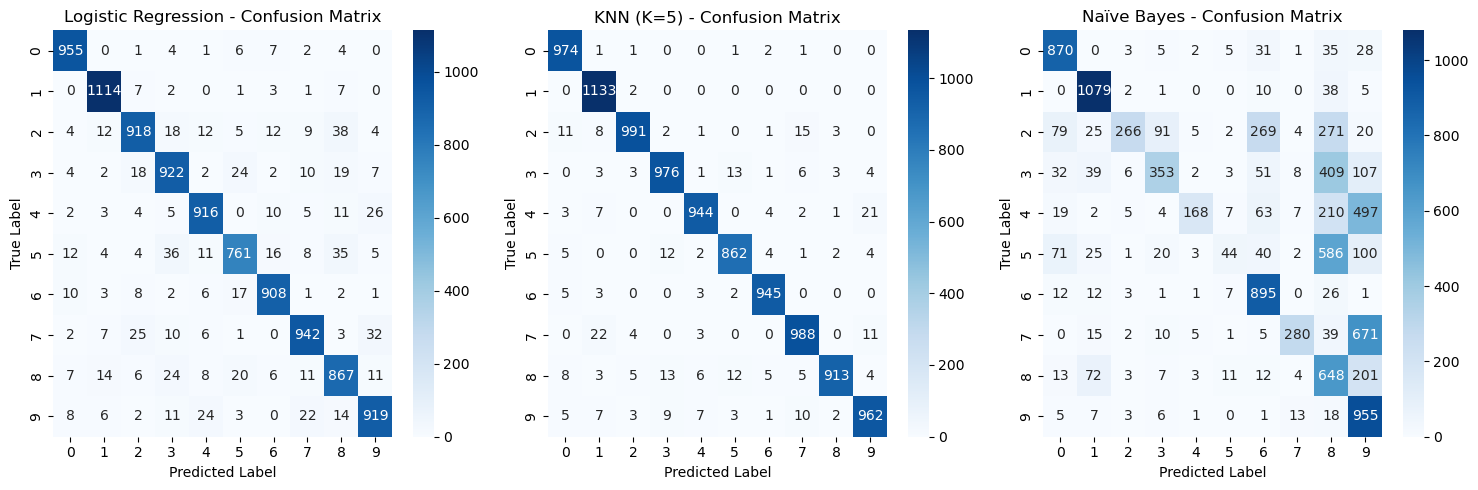

In [20]:

# Plot Confusion Matrices
plt.figure(figsize=(15, 5))

for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    sns.heatmap(result["confusion_matrix"], annot=True, cmap="Blues", fmt="d")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()


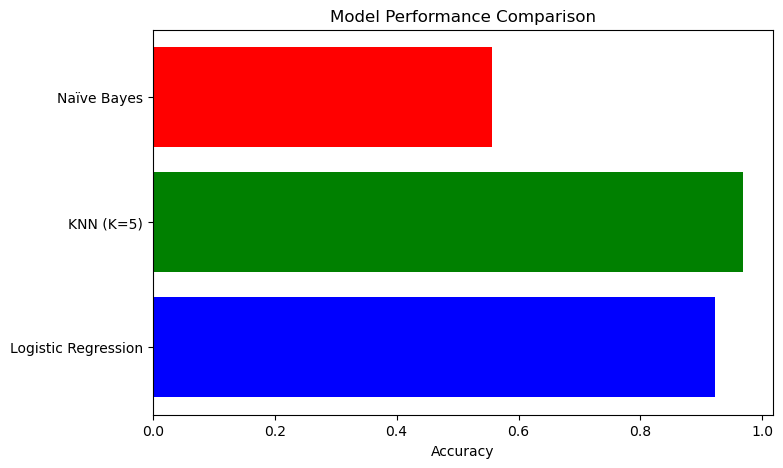

In [21]:

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
model_names = list(results.keys())
accuracies = [results[m]["accuracy"] for m in model_names]

plt.barh(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()
